# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#modelo de regresion simple
#con ols hay que ponerle fit para que se ajuste
lm = smf.ols(formula="Sales~TV", data = data).fit()
# el fit sirve para crear la recta que mejor se ajuste utilziando
# la tecnica de minimizar la suma de los errores al cuadrado

In [6]:
lm.param
# por cada dolar gastado
# alfa es el intercept
# beta es el coeficiente que acompana
# esto significa que un incremento en 100 unidades de publicidad en television, se traduciria en 4.7 ventas adicionales

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería 
Sales = 7.032594 + 0.047537 * TV

In [ ]:
# al ser valores estimados, cada variable tiene un p-valor asociado
# nos dice si es pequeno y si tiene signifcancia
# asumiendo que queremos un nivel de significacion de 95%.
# etas dos variables son menores a 0.05, SON SIGNIFICATIVOAS y no son ceros. Si importan
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
#r2, es el nivel ajuste del modelo
lm.rsquared

0.611875050850071

In [ ]:
# modificacion al numero de elementos, es un poco mas efectivo
lm.rsquared_adj

0.6099148238341623

In [7]:
# vision general
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        03:22:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [8]:
#usar el modelo apra predecir las ventas usando el modelo que acabamos de ahcer, usano como parametro de entrada
# la tv
# calculas las ventas usando solo los gastos de tv
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [9]:
import matplotlib.pyplot as plt

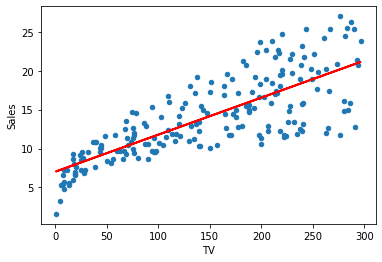

In [10]:
#se ajusta no se ajusta
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [ ]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [ ]:
#cuanto nos estamos equivocando?
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [ ]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [ ]:
#error de mas enos 3.25
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [ ]:
sales_m = np.mean(data["Sales"])

In [ ]:
#promedio de ventas
sales_m

14.022500000000003

In [ ]:
error = RSE/sales_m

In [ ]:
#23%  de error
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

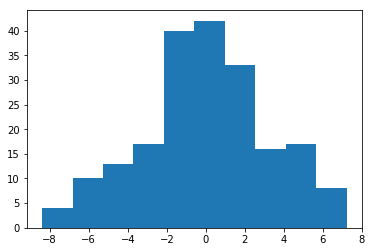

In [ ]:
plt.hist((data["Sales"]-data["sales_pred"]))

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [11]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [12]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [13]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948+0.046901*TV + 0.044219*Newspaper

In [14]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [15]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [16]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.95e-45
Time:                        03:35:36   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.0

In [17]:
#Añadir la Radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [18]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        03:35:54   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [19]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [26]:
RSE

1.6855103734147436

In [21]:
#Añadir la Radio al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [22]:
print(lm4.summary())
#significancia
#coeficiente negativo
# tiene un parametro pero es malo

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        03:36:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [23]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

In [24]:
RSE

1.6855103734147436

## Multicolinealidad 
#### Factor Inflación de la Varianza

Correlacion entre variables predictoras
Si bien es baja pero es signficiativa

Hay que ir a mas detalle e investigar, no se pueden tener a las dos

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [ ]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [ ]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [ ]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

# la radio yel periodidico tienen casi el mimso VIF entonces hay correlacion, pero no con TV
# la variabilidad baja entonces me quedo con radio y tele

1.1449519171055353

In [28]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        03:49:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0